In [2]:
!pip install pyathena


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
#Libraries
from pyathena import connect
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [4]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name1 = 'viamericas'
database_name2 = 'analytics'
tabla1 = 'tb2_fraud_jp'
tabla2 = 'tb_fraud_jp'
tabla3 = 'receiver'

In [33]:
#Connection

conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
df1 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{tabla1};', conn)
df2 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{tabla2};', conn)
df_hora = pd.read_sql(f'SELECT	hour(DATE_RECEIVER) hora, COUNT(*) cant FROM	{origin_name}.{database_name1}.{tabla3} GROUP BY hour(DATE_RECEIVER);', conn)
df_dia = pd.read_sql(f'SELECT	day_of_week(DATE_RECEIVER) dia, COUNT(*) cant FROM	{origin_name}.{database_name1}.{tabla3} GROUP BY day_of_week(DATE_RECEIVER);', conn)


/tmp/ipykernel_3581/3152341669.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{tabla1};', conn)
/tmp/ipykernel_3581/3152341669.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name2}.{tabla2};', conn)
/tmp/ipykernel_3581/3152341669.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_hora = pd.read_sql(f'SELECT	hour(DATE_RECEIVER) hora, COUNT(*) cant FROM	{origin_name}.{database_name1}.{tabla3

In [6]:
df2.was_fraud.value_counts()

was_fraud
True     1726
False     142
Name: count, dtype: int64

In [23]:
df1.head()

,date_receiver,id_receiver,id_branch,fraud_type,id_sender,id_country_receiver,id_payment,id_state_receiver,id_city_receiver,bank_receiver,score,was_fraud,date_created,date_processed,dia_semana,hora
0,2022-02-02 17:40:09.473,5761.0,A06763,Remote Access,1091.0,MEX,C,MEX43,ME500,,NaN,True,2023-01-25 15:54:56.097,NaT,2.0,17.0
1,2022-02-23 16:50:02.520,1347.0,A21266,Remote Access,126.0,ELS,C,ELS13,ELS14,,0.740618,True,2023-01-25 15:55:30.333,2023-02-08 19:45:48.080,2.0,16.0
2,2022-03-04 17:59:36.560,25962.0,A14741,Remote Access,3279.0,MEX,C,MEX16,ME379,,1.0,True,2023-01-25 15:54:16.353,2023-03-03 20:24:58.507,4.0,17.0
3,2022-03-08 20:10:35.857,8467.0,A18709,Remote Access,2933.0,HON,C,HON06,HN052,,0.751378,True,2023-01-25 15:54:36.097,2023-02-07 22:42:58.523,1.0,20.0
4,2022-03-15 15:34:41.813,216.0,A21948,Remote Access,113.0,ELS,C,ELS02,SV137,,0.87727,True,2023-01-25 15:54:48.887,2023-02-07 14:56:31.253,1.0,15.0


In [8]:
print(sns.__version__)

0.11.2


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


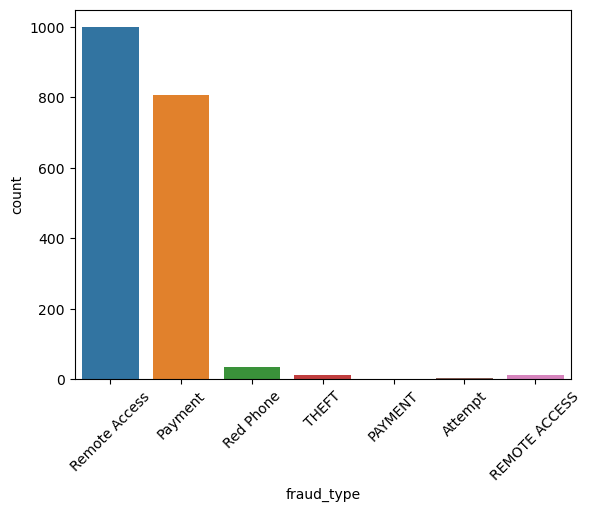

In [9]:
sns.countplot(data=df1, x = 'fraud_type')
plt.xticks(rotation=45);

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


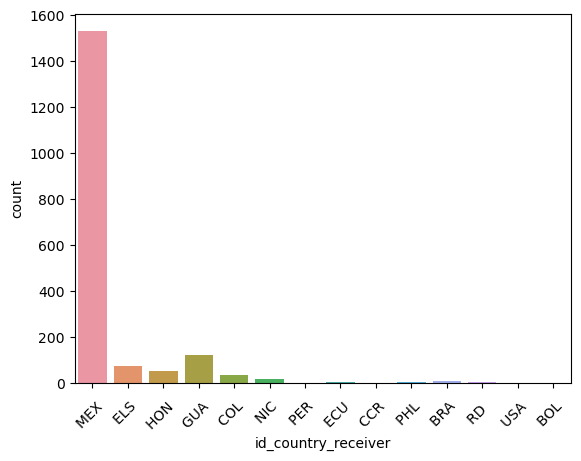

In [10]:
sns.countplot(data=df1, x = 'id_country_receiver')
plt.xticks(rotation=45);

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


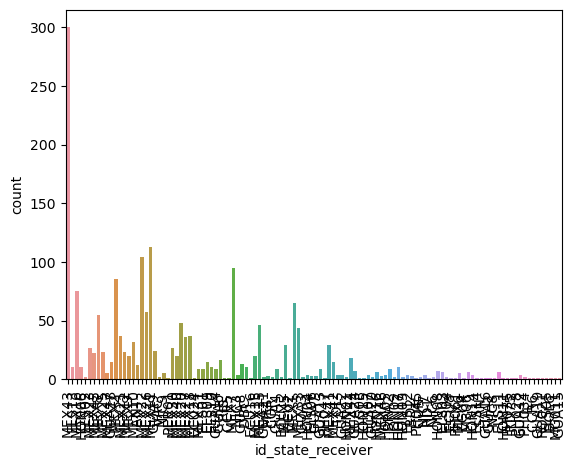

In [11]:
sns.countplot(data=df1, x = 'id_state_receiver')
plt.xticks(rotation=90);

In [41]:
df1.loc['date_receiver'] = pd.to_datetime(df1['date_receiver'])
df1['dia_semana'] = df1['date_receiver'].dt.weekday


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='dia_semana', ylabel='count'>

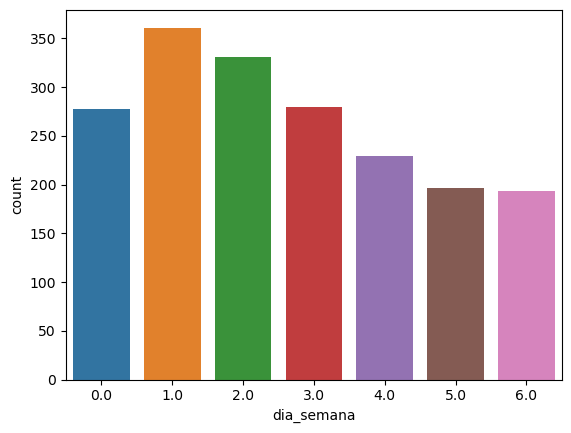

In [42]:
sns.countplot(data=df1, x = 'dia_semana')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='hora', ylabel='count'>

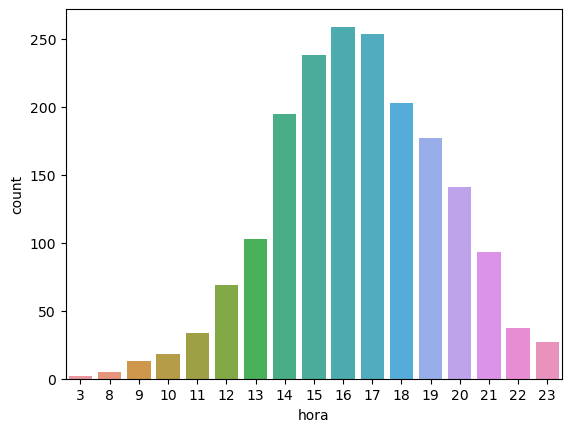

In [37]:
df1['hora'] =  df1['date_receiver'].dt.hour
sns.countplot(data=df1, x = 'hora')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='hora', ylabel='cant'>

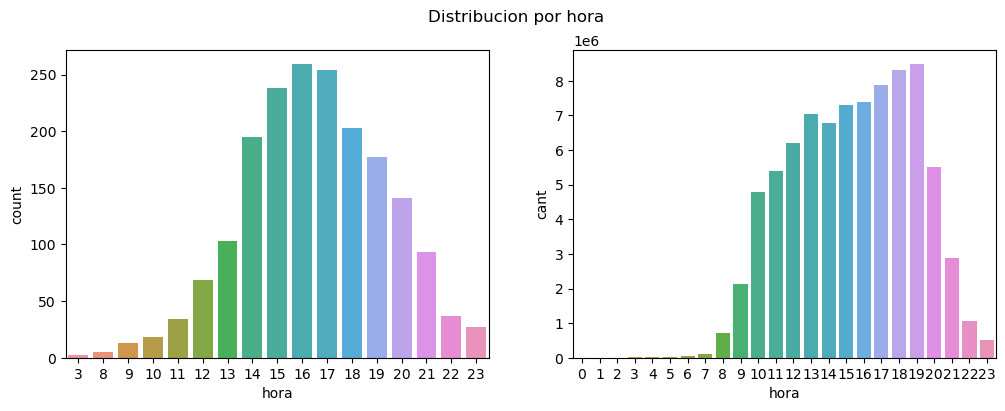

In [39]:
fig, axs = plt.subplots(1,2,figsize = (12, 4))
fig.suptitle('Distribucion por hora')
sns.countplot(data = df1, x = 'hora', ax = axs[0])
sns.barplot(data = df_hora, x ='hora', y = 'cant', ax = axs[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='dia', ylabel='cant'>

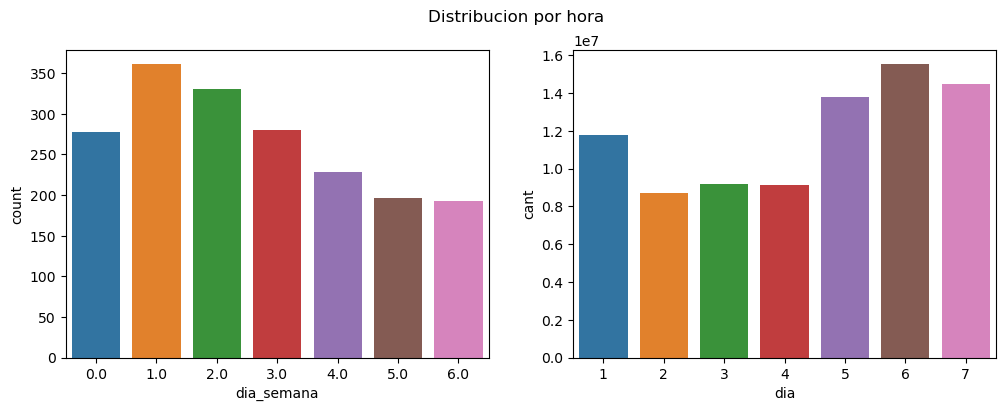

In [43]:
fig, axs = plt.subplots(1,2,figsize = (12, 4))
fig.suptitle('Distribucion por hora')
sns.countplot(data=df1, x = 'dia_semana', ax = axs[0])
sns.barplot(data = df_dia, x ='dia', y = 'cant', ax = axs[1])

In [18]:
df1['hora'].value_counts()

hora
16.0    259
17.0    254
15.0    238
18.0    203
14.0    195
19.0    177
20.0    141
13.0    103
21.0     93
12.0     69
22.0     37
11.0     34
23.0     27
10.0     18
9.0      13
8.0       5
3.0       2
Name: count, dtype: int64

In [45]:
df1.id_payment.value_counts()


id_payment
C     1868
Name: count, dtype: int64

In [44]:
sns.boxplot(data=df1, y='score', x ='was_fraud')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


TypeError: Neither the `x` nor `y` variable appears to be numeric.